In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Initial Bankroll
B0 = 1

# Profit Per $1 Bet
W = 1/1.10

# Loss Per $1 Bet
L = 1


p = np.arange(0,1,step=.05)



In [7]:
f = 1

In [10]:
def exp_bankroll(B0, f, W, L, p):
  return (1+W*f)*p+(1-L)*(1-p)

In [27]:
np.random.binomial(n=1,p=.25,size=1000).mean()


0.242

In [ ]:
for p in np.arange(0,1,step=.05):
  bet_outcome = np.random.binomial(n=1,p=p, size=1000)


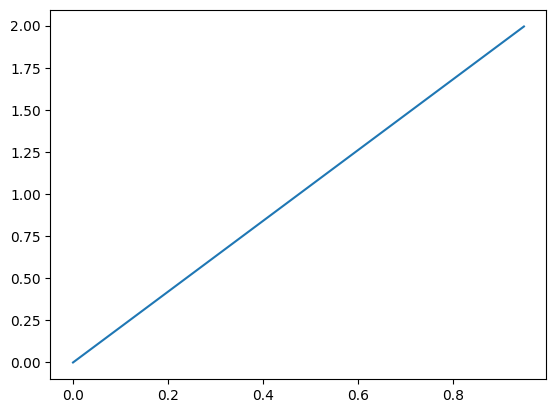

In [12]:
plt.plot(p, exp_bankroll(B0=B0,f=f, W=W, L=L, p=p))

In [28]:
def kelly_f(p,W,L):
  return (p*W-(1-p)*L)/(W*L)



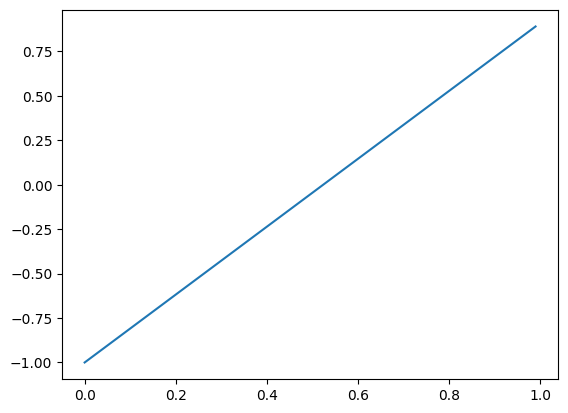

In [30]:
p = np.arange(0,1,step=.01)
plt.plot(p, kelly_f(p=p,W=1,L=1.1))

In [70]:
kgc = pd.DataFrame()
kgc['win_prob'] = p
kgc['f'] = kelly_f(p=p,W=1/1.1,L=1)
kgc['exp_growth'] = kgc['win_prob']*np.log(1+1*kgc['f'])+(1-kgc['win_prob'])*np.log(1-1.1*kgc['f'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [71]:
kgc54 = kgc[kgc['win_prob']>=.54]

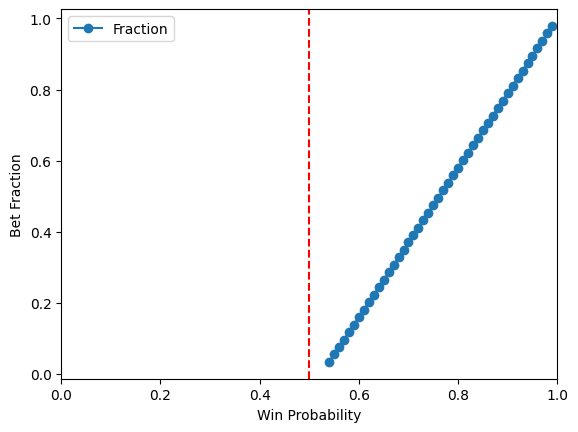

In [76]:
plt.plot(kgc54['win_prob'], kgc54['f'], marker='o', label='Fraction')
plt.xlabel('Win Probability')
plt.ylabel('Bet Fraction')
plt.xlim([0,1])
plt.legend(loc='best')
plt.axvline(x=.50, color='red', linestyle='dashed')

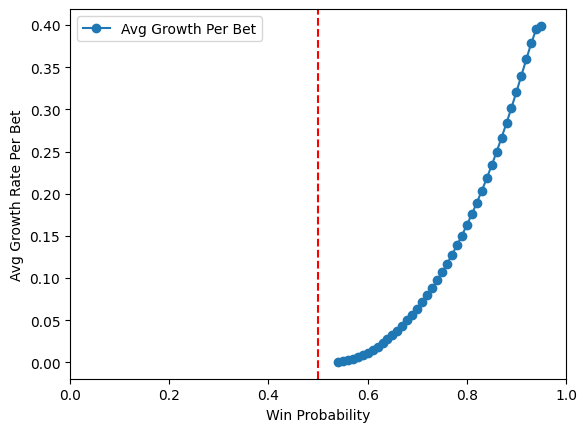

In [82]:
plt.plot(kgc54['win_prob'], kgc54['exp_growth'], marker='o', label='Avg Growth Per Bet')
plt.xlabel('Win Probability')
plt.ylabel('Avg Growth Rate Per Bet')
plt.xlim([0,1])
plt.legend(loc='best')
plt.axvline(x=.5, color='red', linestyle='dashed')

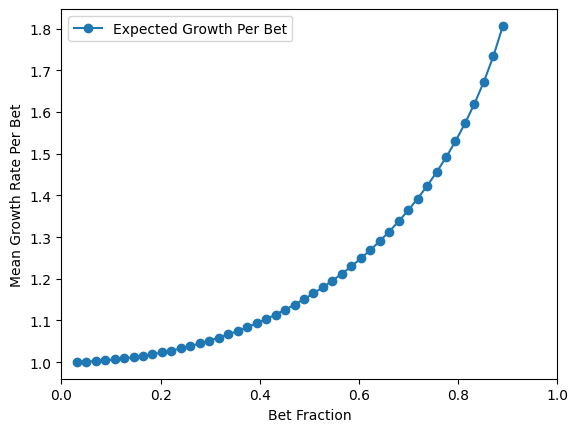

In [58]:
plt.plot(kgc54['f'], np.exp(kgc54['exp_growth']), marker='o', label='Expected Growth Per Bet')
plt.xlabel('Bet Fraction')
plt.ylabel('Mean Growth Rate Per Bet')
plt.xlim([0,1])
plt.legend(loc='best')

In [60]:
def exp_log_bankroll(W,L,f,p):
  return p*np.log(1+W*f)+(1-p)*np.log(1-L*f)

In [83]:
f = np.arange(0,.5,step=.05)
gr = exp_log_bankroll(W=1/1.1,L=1,p=.6,f=f)

In [86]:
kelly_f(p=.6, W=1/1.1, L=1)

0.15999999999999995

In [84]:
pd.DataFrame({'fraction':f,'GrowthRate':gr})


,fraction,GrowthRate
0,0.00,0.000000
1,0.05,0.006154
2,0.10,0.010063
3,0.15,0.011692
4,0.20,0.010975
5,0.25,0.007804
6,0.30,0.002027
7,0.35,-0.006561
8,0.40,-0.018237
9,0.45,-0.033368


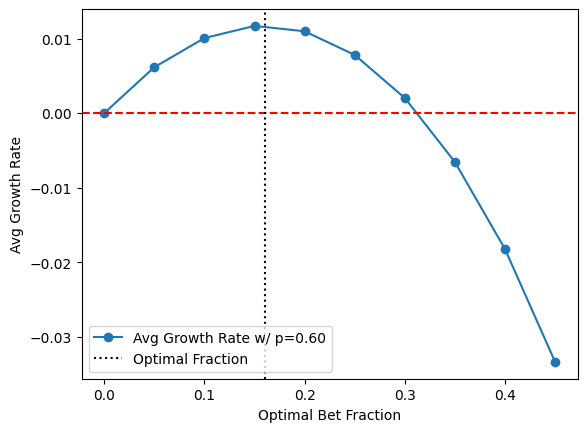

In [90]:
plt.plot(f,gr, marker='o', label='Avg Growth Rate w/ p=0.60')
plt.xlabel('Optimal Bet Fraction')
plt.ylabel('Avg Growth Rate')

plt.axhline(y=0, color='red', linestyle='dashed')
plt.axvline(x=kelly_f(p=.6, W=1/1.1, L=1), color='black', linestyle='dotted', label='Optimal Fraction')
plt.legend(loc='best')